## Machine Learning Project
Predicting the rental price in Belo Horizonte (Brazil)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')


_______
Data Exploration
_______

In [49]:
df = pd.read_csv('house_data.csv')
df.shape

(10692, 13)

In [50]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [51]:
df.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace = True)

In [52]:
df.isna().sum().sort_values(ascending = False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [53]:
df.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [55]:
df.dtypes.value_counts()

int64     7
object    4
dtype: int64

____
EDA
____

In [56]:
categorical_columns = df.columns[df.dtypes == object]
numerical_columns = df.columns[df.dtypes != object]

In [57]:
# Percentage of total
for column in categorical_columns:
    analysis = df[column].value_counts(normalize = True)*100
    print(column, '\n', analysis,'\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [58]:
df.loc[df['floor'] == '301']
df.iloc[2562, 5] = 30

In [59]:
df['floor'] = df['floor'].apply(lambda x:0 if x == '-' else x)
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [60]:
df['floor'] = pd.to_numeric(df['floor'])

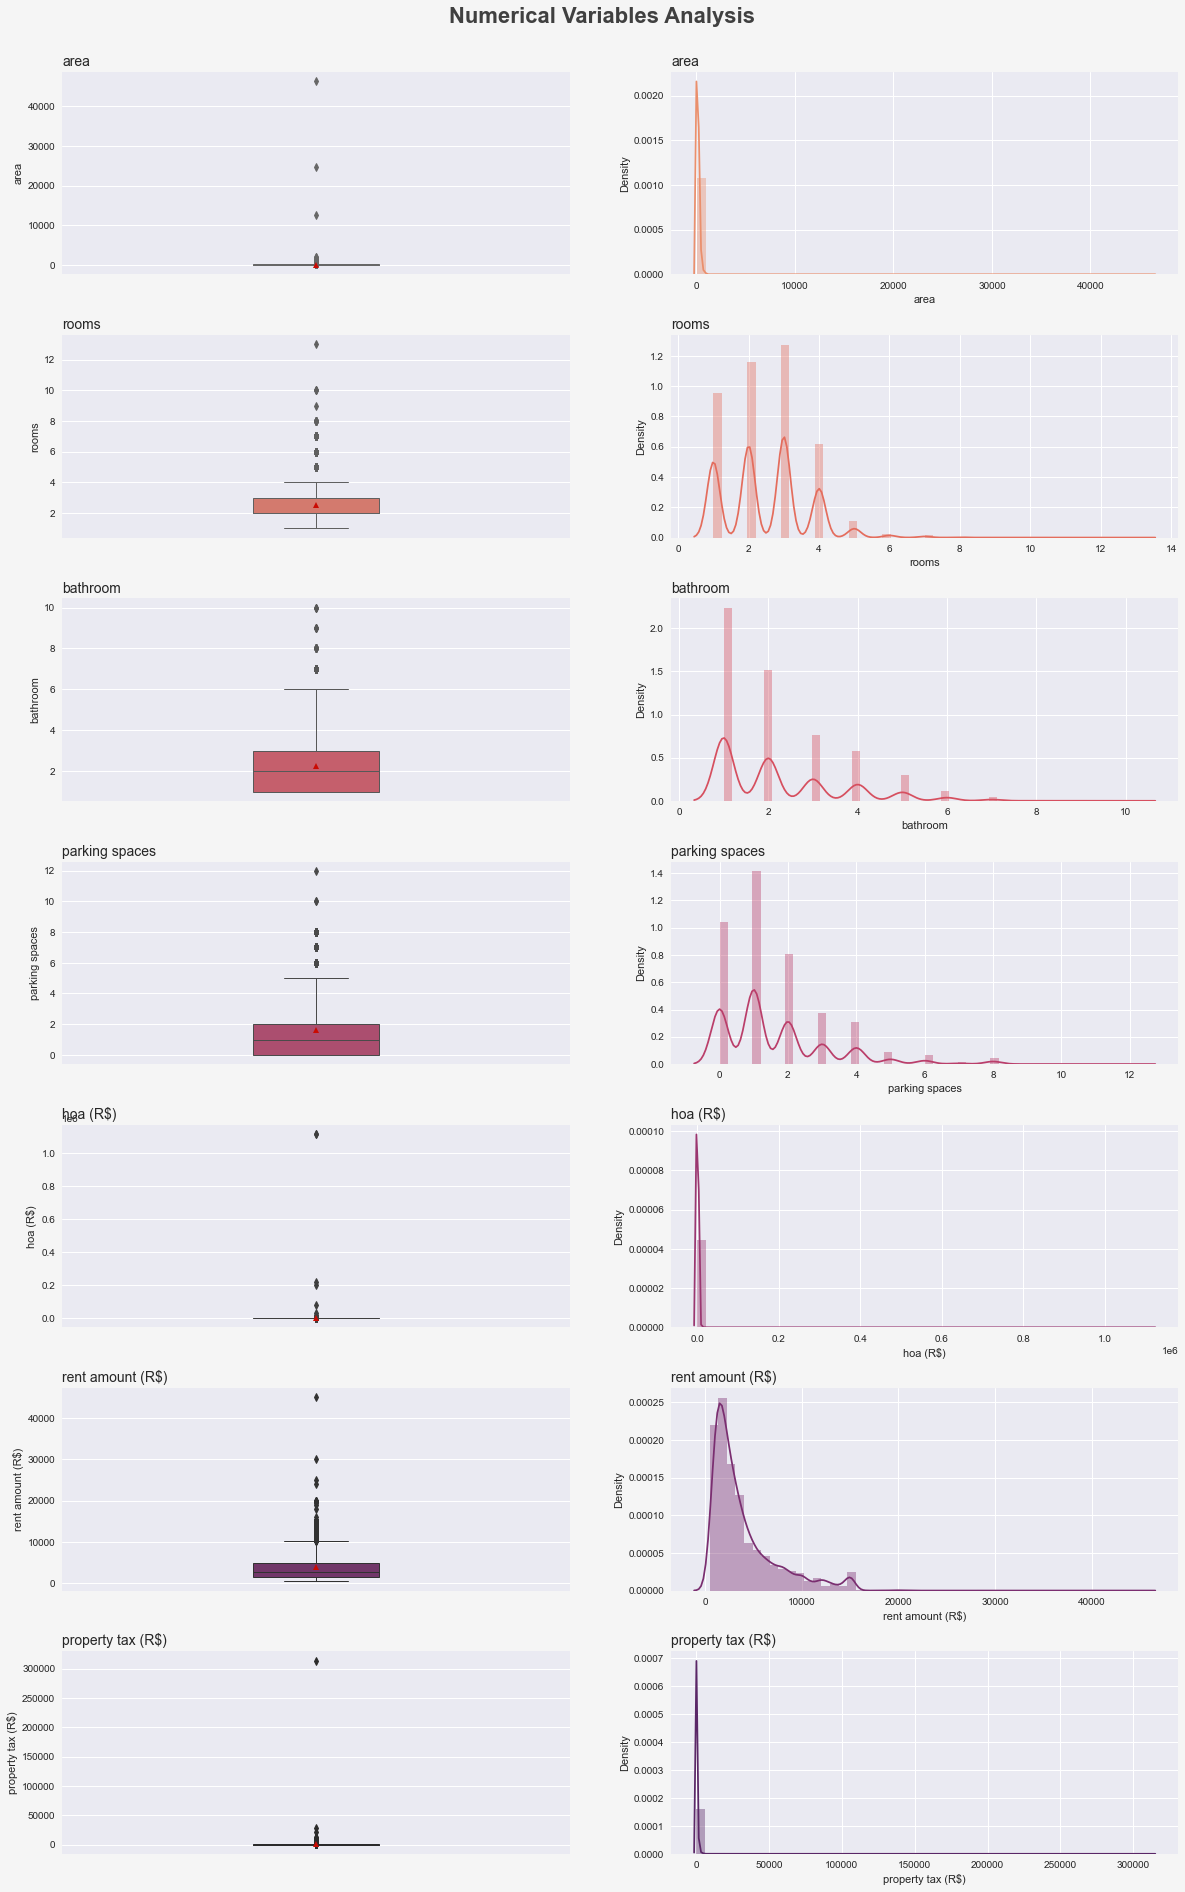

In [61]:
fig, ax = plt.subplots(figsize = (20,30))

background_color = "#F5F5F5"
fig.set_facecolor(background_color)

color_palette = sns.color_palette('flare', len(numerical_columns)*2) 

plt.suptitle("Numerical Variables Analysis", fontsize =22, color = '#404040', fontweight = 600)

lines = 7 # All numerical categories
columns = 2 #Boxplot and Distplot
position = 1

for column in numerical_columns:
    #Boxplot
    plt.subplot(lines, columns,position)
    plt.title(f'{column}', loc ="left", fontsize = 14, fontweight = 200)
    sns.boxplot(data = df, y = column, showmeans = True, saturation= 0.75, 
                linewidth=1, color = color_palette[position], width =0.25)
    position+=1

    #Distplot
    plt.subplot(lines, columns,position)
    plt.title(f'{column}', loc ="left", fontsize = 14, fontweight = 200)
    sns.distplot(df[column], color = color_palette[position-1])
    position+=1

plt.subplots_adjust(top = 0.95,hspace = 0.30)

In [62]:
# Treating area outliers
df[df['area'] > 3000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96


In [63]:
df[(df['city'] == 'Campinas') & (df['rent amount (R$)'] == 1600)]
df.iloc[9241, 1] = df[(df['city'] == 'Campinas') & (df['rent amount (R$)'] == 1600)]['area'].median()
df.iloc[2397, 1] = 463
df.drop(5915,inplace = True)

In [64]:
# Treating hoa(condo) outliers
df[df['hoa (R$)'] >10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64
415,São Paulo,488,4,3,3,0,acept,not furnished,14130,6400,1214
1213,São Paulo,850,6,7,4,0,not acept,not furnished,15000,13000,2465
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900
5293,São Paulo,850,5,7,8,1,not acept,not furnished,14000,4000,0
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64


In [65]:
df['hoa (R$)'].loc[df['hoa (R$)'] == 1117000] = 1117
df['hoa (R$)'].loc[df['hoa (R$)'] == 32000] = 320
df.drop(2928,inplace = True)
df['hoa (R$)'].loc[df['hoa (R$)'] == 220000	] = 2200
df['hoa (R$)'].loc[df['hoa (R$)'] == 200000	] = 2000

In [66]:
# Treating property tax (R$) outliers
df[df['property tax (R$)'] >10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880
5331,São Paulo,300,4,5,5,6,not acept,not furnished,3500,1990,10830
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700
10172,Belo Horizonte,260,4,4,6,10,acept,furnished,3200,11900,12500


In [67]:
df.drop(6645,inplace = True)

____
Features Engineering
____

In [68]:
df['animal'] = df['animal'].map({'acept':1,'not acept':0})
df['furniture'] = df['furniture'].map({"furnished":1, 'not furnished':0})

In [159]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [232]:
BH_filter = df.loc[df['city']=='Belo Horizonte']

In [233]:
BH_filter.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
21,Belo Horizonte,42,1,1,1,17,0,1,470,2690,172
27,Belo Horizonte,64,2,2,1,11,1,0,352,1500,80
37,Belo Horizonte,80,3,2,1,0,1,0,0,11000,425
42,Belo Horizonte,200,4,2,1,7,0,0,850,2550,9
43,Belo Horizonte,45,1,1,1,5,1,0,500,1631,192


In [234]:
BH_filter.drop(columns = 'city', inplace = True)

In [235]:
SP_features = BH_filter.drop(columns = 'rent amount (R$)')
SP_prediction = BH_filter['rent amount (R$)']

display(SP_features.head())
display(SP_prediction.head())

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
21,42,1,1,1,17,0,1,470,172
27,64,2,2,1,11,1,0,352,80
37,80,3,2,1,0,1,0,0,425
42,200,4,2,1,7,0,0,850,9
43,45,1,1,1,5,1,0,500,192


21     2690
27     1500
37    11000
42     2550
43     1631
Name: rent amount (R$), dtype: int64

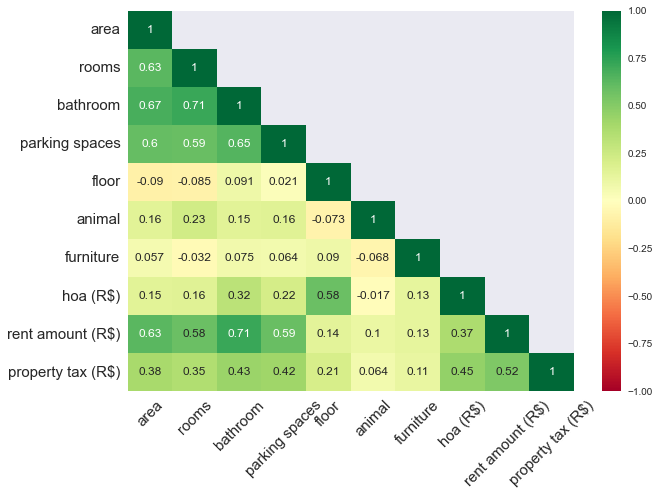

In [236]:
plt.figure(figsize=(10,7))
#Escolhe a correlação
corr = BH_filter.corr()

matrix = np.triu(BH_filter.corr())
np.fill_diagonal(matrix, False)

heat_1 = sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, mask = matrix, annot = True, annot_kws={'size':12});
heat_1.set_xticklabels(heat_1.get_xmajorticklabels(), fontsize = 15);
heat_1.set_yticklabels(heat_1.get_ymajorticklabels(), fontsize = 15);
heat_1.tick_params(axis='x', rotation=45)

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
x_train,x_test,y_train,y_test = train_test_split(SP_features, SP_prediction, test_size = 0.30, random_state= 10)

print(f'Train data: {x_train.shape[0]}')
print(f'Test data: {x_test.shape[0]}')

Train data: 880
Test data: 378


In [239]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest
#mutual_info_regression - evaluates the dependency between 2 variables - 0 (no dependency)

def featureSelection (x_train, y_train):
    selection = SelectKBest(score_func= mutual_info_regression, k = 'all')
    selection.fit(x_train, y_train)

    return selection

scores = featureSelection (x_train,y_train)

for i,score in enumerate(scores.scores_): #.scores_ brings the relations of mutual_info_regression
    print(f'{x_train.columns[i]} : {score.round(3)}')

area : 0.384
rooms : 0.428
bathroom : 0.455
parking spaces : 0.378
floor : 0.045
animal : 0.0
furniture : 0.017
hoa (R$) : 0.193
property tax (R$) : 0.223


- Area, rooms, bathroom and parking spaces are the features that most influence our variable of interest

__________
Machine Learning Model
__________

In [240]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_depth = 5)
forest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [241]:
# Performance Evaluation
predictions = forest_model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: {sqrt(mean_squared_error(y_test,predictions))}') #Error of R$1968.00
print(f'R2 Score: {r2_score(y_test,predictions)}')

RMSE: 1968.4367317327435
R2 Score: 0.6938251390430381


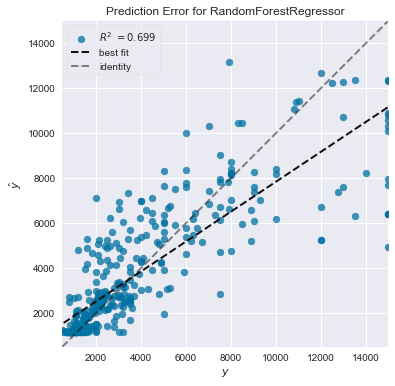

In [242]:
from yellowbrick.regressor import PredictionError

model = RandomForestRegressor(max_depth = 5)
model_error = PredictionError(model)

model_error.fit(x_train, y_train)
model_error.score(x_test, y_test)
model_error.show();

In [243]:
from sklearn.linear_model import LinearRegression
model_02 = LinearRegression()
model_02.fit(x_train, y_train)
predict_lr = model_02.predict(x_test)
print(f'RMSE: {sqrt(mean_squared_error(y_test,predict_lr))}') #Error of R$2216.00
print(f'R2 Score: {r2_score(y_test,predict_lr)}')

RMSE: 2216.2407443223146
R2 Score: 0.611884955183206


In [244]:
from sklearn.linear_model import Ridge
model_03 = Ridge(alpha=1.0)
model_03.fit(x_train, y_train)
predict_ridge = model_03.predict(x_test)
print(f'RMSE: {sqrt(mean_squared_error(y_test,predict_ridge))}') #Error of R$2216.00
print(f'R2 Score: {r2_score(y_test,predict_ridge)}')

RMSE: 2216.3019212233353
R2 Score: 0.6118635279050988


In [245]:
from sklearn.linear_model import Lasso
model_04 = Lasso()
model_04.fit(x_train, y_train)
predict_lasso = model_04.predict(x_test)
print(f'RMSE: {sqrt(mean_squared_error(y_test,predict_lasso))}') #Error of R$2216.00
print(f'R2 Score: {r2_score(y_test,predict_lasso)}')

RMSE: 2216.1595548480527
R2 Score: 0.6119133909741643


In [251]:
from sklearn.preprocessing import PolynomialFeatures
model_05 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = model_05 .fit_transform(x_train)
model_05.fit(X_poly, y_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

predict_poli = lin2.predict(model_05.fit_transform(x_test))

print(f'RMSE: {sqrt(mean_squared_error(y_test,predict_poli))}') #Error of R$2264.00
print(f'R2 Score: {r2_score(y_test,predict_poli)}')


RMSE: 2264.582840420115
R2 Score: 0.594768653554433


In [247]:
#Exporting the model

import joblib
joblib.dump(forest_model, "Fores_Model_v1.pkl")

['Fores_Model_v1.pkl']

In [248]:
load_function_model = joblib.load("Fores_Model_v1.pkl")

In [249]:
load_function_model.predict(x_test.head(1).values)

array([1219.50183554])